In [1]:
#imports

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #training with either cpu or cuda

In [2]:
device

device(type='cuda')

In [3]:
# Hyper parameters
num_epochs = 20
batch_size = 250
learning_rate = 0.0001

In [4]:
# dataset

tranform = transforms.Compose([transforms.Resize((227,227)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset= CIFAR10("data/", train=True, download=True, transform=tranform) #50,000 original images
test_dataset=CIFAR10("data/", train=False, download=True, transform=tranform) #10,000 images

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 33825812.72it/s]


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [5]:
type(train_dataset)

torchvision.datasets.cifar.CIFAR10

In [6]:
# dataloader

train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# model_part_a

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=10)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5)
        x = self.fc3(x)
        return x

In [ ]:
# train_RMSprop_part_b

model = AlexNet()
model = model.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr= learning_rate, momentum=0.9)

for epoch in range(num_epochs):
  model.train()
  loss_ep = 0


  for batch, (inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device=device)
    targets = targets.to(device=device)

    # Forward Pass
    optimizer.zero_grad()
    yhat = model(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    loss_ep += loss.item()
  print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")


In [15]:
targets

tensor([7, 8, 3, 9, 1, 9, 7, 2, 2, 5, 4, 4, 9, 8, 3, 5, 9, 1, 6, 2, 4, 0, 9, 2,
        1, 1, 3, 7, 0, 5, 5, 4, 5, 6, 9, 5, 9, 7, 3, 5, 2, 7, 1, 6, 2, 9, 6, 7,
        1, 2, 3, 8, 6, 6, 0, 4, 4, 0, 9, 7, 8, 7, 0, 2, 0, 2, 4, 9, 8, 9, 0, 7,
        6, 9, 2, 4, 2, 0, 7, 5, 5, 1, 7, 6, 8, 1, 4, 9, 3, 4, 6, 8, 6, 1, 9, 8,
        0, 0, 9, 6, 5, 8, 2, 2, 1, 3, 3, 3, 5, 2, 4, 0, 1, 0, 6, 4, 2, 4, 0, 7,
        6, 1, 8, 5, 0, 5, 6, 7, 5, 0, 1, 7, 5, 6, 6, 4, 1, 5, 0, 5, 0, 3, 9, 4,
        3, 9, 4, 5, 4, 1, 3, 3, 5, 3, 9, 9, 1, 9, 9, 7, 1, 1, 6, 8, 4, 7, 1, 2,
        3, 0, 7, 6, 1, 4, 9, 8, 2, 5, 4, 9, 0, 7, 1, 5, 0, 0, 3, 3, 2, 5, 2, 6,
        6, 9, 0, 2, 7, 4, 9, 4, 4, 0, 5, 8, 0, 8, 3, 0, 7, 0, 5, 3, 0, 7, 6, 4,
        6, 3, 5, 8, 1, 7, 4, 7, 2, 2, 6, 5, 9, 4, 6, 7, 6, 5, 4, 2, 0, 8, 9, 6,
        0, 1, 6, 6, 1, 7, 8, 0, 3, 6], device='cuda:0')

In [ ]:
# save model

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
PATH = "/content/drive/My Drive/Alex_RMSProp"
torch.save(model, PATH)


Mounted at /content/drive


Got 6147 / 10000 with accuracy 61.47


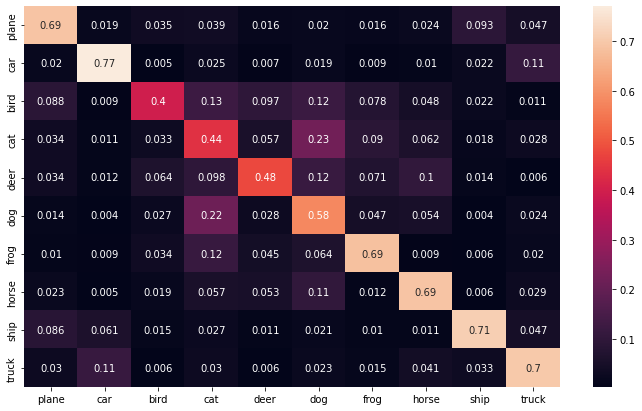

In [ ]:
# test_RMSprop
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
num_correct = 0
num_samples = 0
model.eval()
for batch, (inputs, targets) in enumerate(test_loader):
  inputs = inputs.to(device='cpu')
  targets = targets.to(device='cpu')
  model.to(device='cpu')
  # Forward Pass
  output = model(inputs)
  _, predictions = output.max(1)
  y_pred.extend(predictions)
  y_true.extend(targets)
  num_correct += (predictions == targets).sum()
  num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)


# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')


In [ ]:
# train_ADAM_part_c

model_2 = AlexNet()
model_2 = model_2.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr= learning_rate)

for epoch in range(num_epochs):
  model_2.train()
  loss_ep = 0

  for batch,(inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device=device)
    targets = targets.to(device=device)

    # Forward Pass
    optimizer.zero_grad()
    yhat = model_2(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    loss_ep += loss.item()
  print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")


Loss in epoch 0 :::: 1.7289712792634964
Loss in epoch 1 :::: 1.3108135390281677
Loss in epoch 2 :::: 1.0936057370901109
Loss in epoch 3 :::: 0.9226534628868103
Loss in epoch 4 :::: 0.7950032940506935
Loss in epoch 5 :::: 0.688581959605217
Loss in epoch 6 :::: 0.6023792533576489
Loss in epoch 7 :::: 0.5243254294991493
Loss in epoch 8 :::: 0.4462266728281975
Loss in epoch 9 :::: 0.3812556491047144
Loss in epoch 10 :::: 0.30988008543848994
Loss in epoch 11 :::: 0.2481927702575922
Loss in epoch 12 :::: 0.1938247364014387
Loss in epoch 13 :::: 0.15859918862581254
Loss in epoch 14 :::: 0.11563227087259292
Loss in epoch 15 :::: 0.09550119750201702
Loss in epoch 16 :::: 0.0775032542552799
Loss in epoch 17 :::: 0.07223216496407986
Loss in epoch 18 :::: 0.05982990436255932
Loss in epoch 19 :::: 0.06290818622335792


In [ ]:
# save model

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
PATH = "/content/drive/My Drive/Alex_ADAM"
torch.save(model_2, PATH)


Mounted at /content/drive


Got 7930 / 10000 with accuracy 79.30


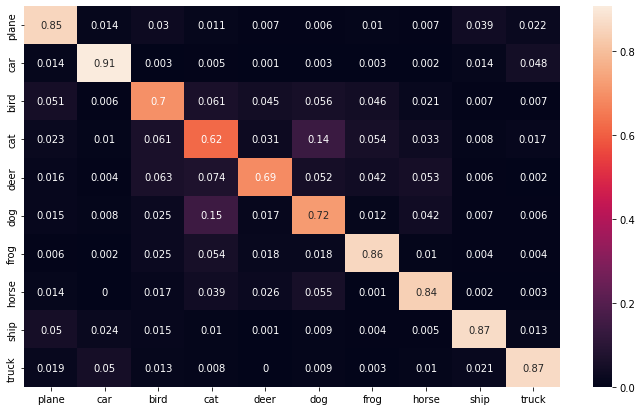

In [ ]:
# test_ADAM
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
num_correct = 0
num_samples = 0
model_2.eval()
for batch, (inputs, targets) in enumerate(test_loader):
  inputs = inputs.to(device="cpu")
  targets = targets.to(device="cpu")
  model_2.to(device='cpu')
  ## Forward Pass
  output = model_2(inputs)
  _, predictions = output.max(1)
  y_pred.extend(predictions)
  y_true.extend(targets)
  num_correct += (predictions == targets).sum()
  num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)


# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
# loading better model (ADAM) to visualize

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
PATH = "/content/drive/My Drive/Alex_ADAM"
model_2=torch.load(PATH)
print(model_2)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
model_2.to(device='cpu')
model_children = list(model_2.children())

Mounted at /content/drive
AlexNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=10, bias=True)
)


In [ ]:
model_children

[Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4)),
 MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
 Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 Linear(in_features=9216, out_features=4096, bias=True),
 Linear(in_features=4096, out_features=4096, bias=True),
 Linear(in_features=4096, out_features=10, bias=True)]

In [ ]:
# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])

print(f"Total convolutional layers: {counter}")

Total convolutional layers: 5


In [ ]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4)) ====> SHAPE: torch.Size([96, 3, 11, 11])
CONV: Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)) ====> SHAPE: torch.Size([256, 96, 5, 5])
CONV: Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 256, 3, 3])
CONV: Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([384, 384, 3, 3])
CONV: Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 384, 3, 3])


In [ ]:
# visualize the conv layer filters

import random
plt.figure(figsize=(50, 50))

for CONV in range(counter):
  num_filters=model_weights[CONV].shape[0] # number of filters in this conv layer
  num_channels=model_weights[CONV].shape[1] # number of channels of each filter in this conv layer
  lst_rand = [random.randint(0, num_filters-1) for x in range(20)] # list number of 20 random filters
  idx=0

  for i in lst_rand:
    filter=model_weights[CONV][i]
    for j in range(num_channels):
      idx += 1
      plt.subplot(20, num_channels, idx)
      plt.imshow(filter[j, :, :].detach(), cmap='gray')

  plt.savefig(f'/content/drive/My Drive/filters{CONV}')

In [ ]:
# part_e_BN_BEFORE_RELU

# model
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.BN_1 = nn.BatchNorm2d(96)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.BN_2 = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.BN_3 = nn.BatchNorm2d(384)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
        self.BN_4 = nn.BatchNorm1d(4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=10)


    def forward(self,x):
        x = F.relu(self.BN_1(self.conv1(x)))
        x = self.maxpool(x)
        x = F.relu(self.BN_2(self.conv2(x)))
        x = self.maxpool(x)
        x = F.relu(self.BN_3(self.conv3(x)))
        x = F.relu(self.BN_3(self.conv4(x)))
        x = F.relu(self.BN_2(self.conv5(x)))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.BN_4(self.fc1(x)))
        x = F.dropout(x, p=0.5)
        x = F.relu(self.BN_4(self.fc2(x)))
        x = F.dropout(x, p=0.5)
        x = self.fc3(x)
        return x


# train_ADAM
model_BR = AlexNet()
model_BR = model_BR.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_BR.parameters(), lr= learning_rate)

for epoch in range(num_epochs):
  model_BR.train()
  loss_ep = 0

  for batch,(inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device=device)
    targets = targets.to(device=device)

    # Forward Pass
    optimizer.zero_grad()
    yhat = model_BR(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    loss_ep += loss.item()
  print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")

Loss in epoch 0 :::: 1.1883874788880349
Loss in epoch 1 :::: 0.7455566707253456
Loss in epoch 2 :::: 0.5631502260267734
Loss in epoch 3 :::: 0.43143863543868066
Loss in epoch 4 :::: 0.32211168110370636
Loss in epoch 5 :::: 0.24322587624192238
Loss in epoch 6 :::: 0.16333587780594827
Loss in epoch 7 :::: 0.11813759662210942
Loss in epoch 8 :::: 0.10173372384160757
Loss in epoch 9 :::: 0.0908824504353106
Loss in epoch 10 :::: 0.07517453214153648
Loss in epoch 11 :::: 0.05499528983607888
Loss in epoch 12 :::: 0.05713563579134643
Loss in epoch 13 :::: 0.05968526651151478
Loss in epoch 14 :::: 0.05910565458238125
Loss in epoch 15 :::: 0.05629847260657698
Loss in epoch 16 :::: 0.04465629211161286
Loss in epoch 17 :::: 0.035231166295707224
Loss in epoch 18 :::: 0.043735190234147014
Loss in epoch 19 :::: 0.041066181734204295


In [ ]:
# save model

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
PATH = "/content/drive/My Drive/Alex_BR"
torch.save(model_BR, PATH)


Mounted at /content/drive


Got 3434 / 10000 with accuracy 34.34


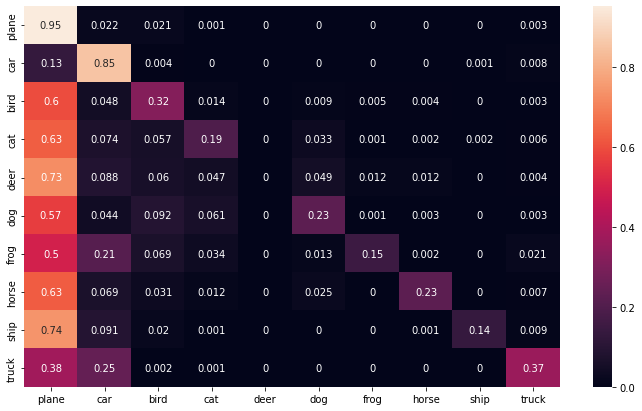

In [ ]:
# test_BR
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
num_correct = 0
num_samples = 0
model_BR.eval()
for batch, (inputs, targets) in enumerate(test_loader):
  inputs = inputs.to(device="cpu")
  targets = targets.to(device="cpu")
  model_BR.to(device='cpu')
  ## Forward Pass
  output = model_BR(inputs)
  _, predictions = output.max(1)
  y_pred.extend(predictions)
  y_true.extend(targets)
  num_correct += (predictions == targets).sum()
  num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)


# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
# part_f_BN_AFTER_RELU

# model
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.BN_1 = nn.BatchNorm2d(96)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.BN_2 = nn.BatchNorm2d(256)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.BN_3 = nn.BatchNorm2d(384)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
        self.BN_4 = nn.BatchNorm1d(4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=10)


    def forward(self,x):
        x = self.BN_1(F.relu(self.conv1(x)))
        x = self.maxpool(x)
        x = self.BN_2(F.relu(self.conv2(x)))
        x = self.maxpool(x)
        x = self.BN_3(F.relu(self.conv3(x)))
        x = self.BN_3(F.relu(self.conv4(x)))
        x = self.BN_2(F.relu(self.conv5(x)))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.BN_4(F.relu(self.fc1(x)))
        x = F.dropout(x, p=0.5)
        x = self.BN_4(F.relu(self.fc2(x)))
        x = F.dropout(x, p=0.5)
        x = self.fc3(x)
        return x

# train_ADAM
model_RB = AlexNet()
model_RB = model_RB.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_RB.parameters(), lr= learning_rate)

for epoch in range(num_epochs):
  model_RB.train()
  loss_ep = 0

  for batch,(inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device=device)
    targets = targets.to(device=device)

    # Forward Pass
    optimizer.zero_grad()
    yhat = model_RB(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    loss_ep += loss.item()
  print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")

Loss in epoch 0 :::: 1.3313385114073752
Loss in epoch 1 :::: 0.8873501232266426
Loss in epoch 2 :::: 0.689793829023838
Loss in epoch 3 :::: 0.5585394911468029
Loss in epoch 4 :::: 0.45378352761268614
Loss in epoch 5 :::: 0.3671884158998728
Loss in epoch 6 :::: 0.3013241405040026
Loss in epoch 7 :::: 0.23564342126250268
Loss in epoch 8 :::: 0.17952487997710706
Loss in epoch 9 :::: 0.1370768791437149
Loss in epoch 10 :::: 0.10821196353062987
Loss in epoch 11 :::: 0.09694390796124935
Loss in epoch 12 :::: 0.08831872582435608
Loss in epoch 13 :::: 0.0802126644551754
Loss in epoch 14 :::: 0.08016710812225938
Loss in epoch 15 :::: 0.06660170055925846
Loss in epoch 16 :::: 0.056487941686064004
Loss in epoch 17 :::: 0.061126421969383955
Loss in epoch 18 :::: 0.08873719264753163
Loss in epoch 19 :::: 0.07654290796257555


In [ ]:
# save model

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
PATH = "/content/drive/My Drive/Alex_RB"
torch.save(model_RB, PATH)


Mounted at /content/drive


Got 7184 / 10000 with accuracy 71.84


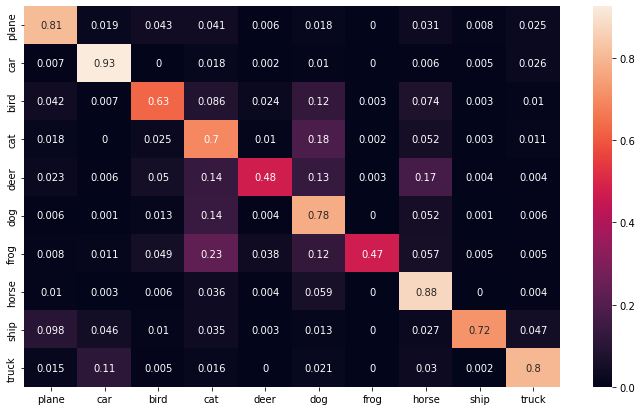

In [ ]:
# test_RB
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
num_correct = 0
num_samples = 0
model_RB.eval()
for batch, (inputs, targets) in enumerate(test_loader):
  inputs = inputs.to(device="cpu")
  targets = targets.to(device="cpu")
  model_RB.to(device='cpu')
  ## Forward Pass
  output = model_RB(inputs)
  _, predictions = output.max(1)
  y_pred.extend(predictions)
  y_true.extend(targets)
  num_correct += (predictions == targets).sum()
  num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)


# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
# model_without dropout and BN

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0 )
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride= 1, padding= 2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
        self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
        self.fc3 = nn.Linear(in_features=4096 , out_features=10)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# train_no_adding
model_NO = AlexNet()
model_NO = model_NO.to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_NO.parameters(), lr= learning_rate)

for epoch in range(num_epochs):
  model_NO.train()
  loss_ep = 0

  for batch,(inputs, targets) in enumerate(train_loader):
    inputs = inputs.to(device=device)
    targets = targets.to(device=device)

    # Forward Pass
    optimizer.zero_grad()
    yhat = model_NO(inputs)
    # calculate loss
    loss = criterion(yhat, targets)
    # credit assignment
    loss.backward()
    # update model weights
    optimizer.step()
    loss_ep += loss.item()
  print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")



Loss in epoch 0 :::: 1.6727926135063171
Loss in epoch 1 :::: 1.2666473117470742
Loss in epoch 2 :::: 1.0249073895812035
Loss in epoch 3 :::: 0.8489321395754814
Loss in epoch 4 :::: 0.7080057433247566
Loss in epoch 5 :::: 0.5886308139562607
Loss in epoch 6 :::: 0.4748216173052788
Loss in epoch 7 :::: 0.35740262404084205
Loss in epoch 8 :::: 0.24241698279976845
Loss in epoch 9 :::: 0.14282899048179387
Loss in epoch 10 :::: 0.09025117104873061
Loss in epoch 11 :::: 0.05592958086170256
Loss in epoch 12 :::: 0.051400599856860935
Loss in epoch 13 :::: 0.03759751846781
Loss in epoch 14 :::: 0.04185523469932377
Loss in epoch 15 :::: 0.035364128479268404
Loss in epoch 16 :::: 0.03160600426374003
Loss in epoch 17 :::: 0.031494406640995294
Loss in epoch 18 :::: 0.028755320215132087
Loss in epoch 19 :::: 0.0226148934639059


Got 7793 / 10000 with accuracy 77.93


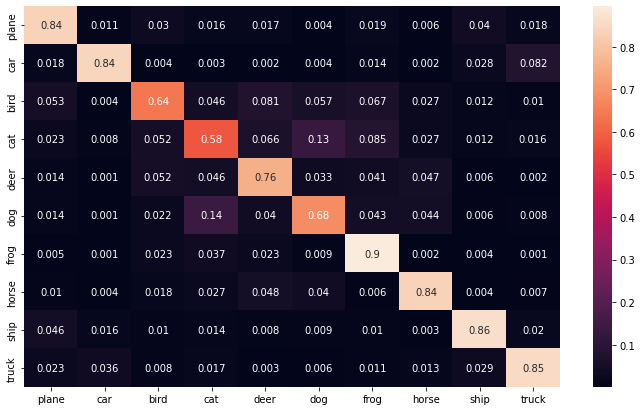

In [ ]:
# test
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
num_correct = 0
num_samples = 0
model_NO.eval()
for batch, (inputs, targets) in enumerate(test_loader):
  inputs = inputs.to(device="cpu")
  targets = targets.to(device="cpu")
  model_NO.to(device='cpu')
  ## Forward Pass
  output = model_NO(inputs)
  _, predictions = output.max(1)
  y_pred.extend(predictions)
  y_true.extend(targets)
  num_correct += (predictions == targets).sum()
  num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)


# confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')